In [59]:
import pandas as pd
import numpy as np
#ranges = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 130, 160, 190, 220, 250, 280, 310, 340, 370, 400, 430, 460, 490, 520, 550]
length = 500
steps = 50
period = int(length/steps)
numbers = []
for i in range(steps):
    numbers.append(i*period)
instrument = 'OBS'
component = 'R'
file_paths = []
for number in numbers:
    file_paths.append((f'Y:\\Heaters_main-1\\Models\\RF_IMP_{component}_{instrument}\\{instrument}_untuned_-1_500_importances_{number}_{component}_{instrument}.csv'))


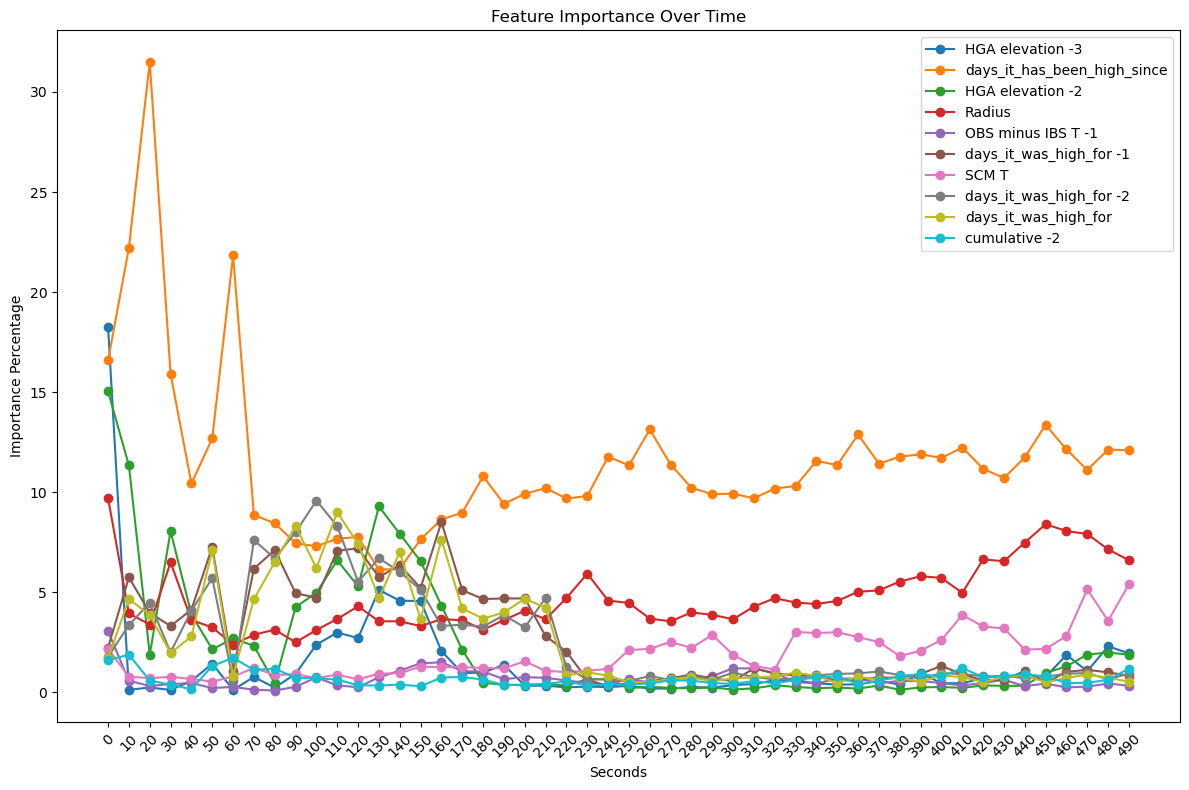

In [60]:
import matplotlib.pyplot as plt
dfs = []
dates = []

for file_path in file_paths:
    df = pd.read_csv(file_path, skiprows=1, usecols=[1, 2], names=['Feature', 'Importance'])
    # Remove the 'Date' row from the DataFrame
    df = df[df['Feature'] != 'Date']
    date = file_path.split('_')[-3].split('.')[0]
    dates.append(date)
    dfs.append(df)

plt.figure(figsize=(12, 8))

# Select the top N features based on the first file, excluding 'Date', or another criterion
N = 10
# Ensure 'Date' is excluded before selecting top features
top_features = dfs[0]['Feature'].iloc[:N]

for feature in top_features:
    importances = [df[df['Feature'] == feature]['Importance'].values[0] if feature in df['Feature'].values else 0 for df in dfs]
    plt.plot(dates, importances, label=feature, marker='o')

plt.xticks(rotation=45)
plt.xlabel('Seconds')
plt.ylabel('Importance Percentage')
plt.title('Feature Importance Over Time')
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()



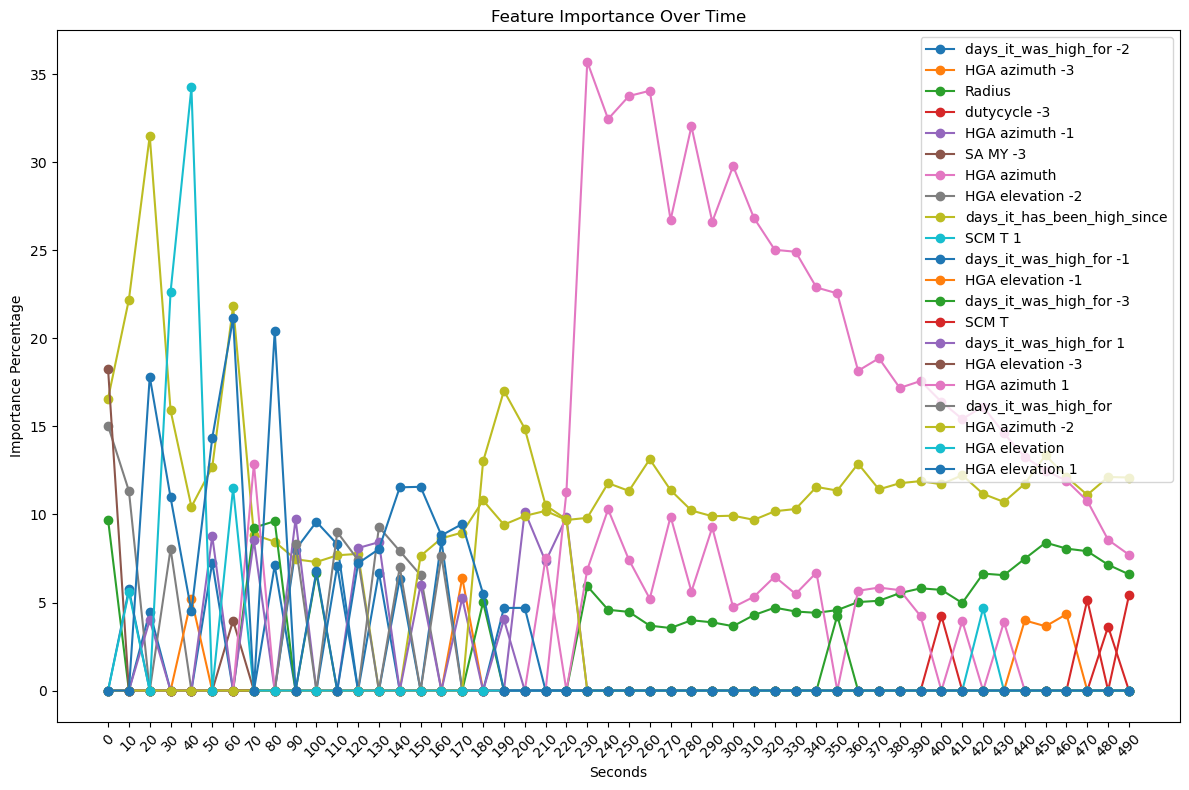

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

dfs = []
dates = []

for file_path in file_paths:
    df = pd.read_csv(file_path, skiprows=1, usecols=[1, 2], names=['Feature', 'Importance'])
    # Remove the 'Date' row from the DataFrame
    df = df[df['Feature'] != 'Date']
    date = file_path.split('_')[-3].split('.')[0]
    dates.append(date)
    # Sort the dataframe based on 'Importance' and select top N values
    df = df.sort_values(by='Importance', ascending=False).head(4)
    dfs.append(df)

plt.figure(figsize=(12, 8))

# Get unique top features from all dataframes
top_features = set().union(*[set(df['Feature']) for df in dfs])

for feature in top_features:
    importances = [df[df['Feature'] == feature]['Importance'].values[0] if feature in df['Feature'].values else 0 for df in dfs]
    plt.plot(dates, importances, label=feature, marker='o')

plt.xticks(rotation=45)
plt.xlabel('Seconds')
plt.ylabel('Importance Percentage')
plt.title('Feature Importance Over Time')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
